In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from Engine.Engine import Value, Neuron, Layer, Visualizer, MLP
from Engine.MLUtils import printPurple

from keras.datasets import mnist

In [16]:
# testing imports
v = Value(1) ; v.label = "v"
v2 = Value(2) ;  v2.label = "v2"
v3 = v * v2 ; v3.label = "v3"

v3.backward()

print(v3)


Value(data=2, grad=1)


In [17]:
# import Data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


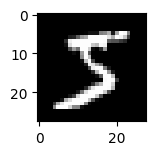

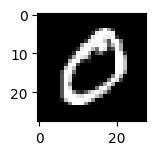

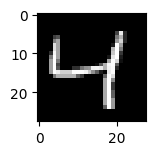

(28, 28)

In [18]:
# See if the data is usable
for i in range(3):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.show()

train_X[0].shape

In [19]:
from Engine.MultiLayerPerceptron import train

print("def train(model, xs, ys, epochs, iterPerEpoch, lr):")

def reshapeImage(image):
    return np.reshape(image, (image.shape[0] * image.shape[1], 1))

def flattenData(inputImages):
    outputImages = []
    """Enter Input Images as an array full of images"""
    for i in range(inputImages.shape[0]):
        outputImages.append(reshapeImage(inputImages[i]))
        
    return np.array(outputImages)
    
    
images = flattenData(train_X)
print(images.shape)

def train(model, xs, ys, epochs, iterPerEpoch, lr):
(60000, 784, 1)


In [20]:
trainImages = flattenData(train_X)
trainLabels = train_y

model1 = MLP(784, [128, 64, 10])


In [22]:
def calcLoss(modelPred, Actual):
    predArray = np.zeros(10)
    predArray[Actual] = 1
    loss = 0
    
    for i, out in enumerate(modelPred):
        loss += (out.data - predArray[i])**2
    
    return loss
        

In [ ]:
# loss function
def loss(model, batch_size=None):
    

    inputs = [list(map(Value, xrow)) for xrow in trainImages]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

In [23]:
def pred(model, image):
    highestPred = -1
    prediction = -1
    for i, out in enumerate(model(image)):
        if out.value > highestPred:
            highestPred = out.value
            prediction = i
        
    if highestPred == -1:
        return "Error"
    else:
        return prediction

prediction = model1(trainImages[1])
actual = trainLabels[1]



In [24]:
loss = calcLoss(prediction, actual)
print(loss)

[1.2212136e+09]


In [82]:
from tqdm import tqdm

def trainMNIST(model, images, labels, epochs, BatchSize, lr):
    """
    def train(model, xs, ys, epochs, iterPerEpoch, lr):
    """
    
    # initialLoss = sum((yOut + (-yGroundTruth)) ** 2 for yGroundTruth, yOut in zip(ys, [model(x) for x in xs]))
    
    print("\n\033[1;33mTraining: \n------------------------\033[0m")
    for i in range(epochs):
        avgLoss = 0
        
        Batches = tqdm(range(BatchSize))
        for k in Batches:            
            predictions = model(images[(i * BatchSize + k)])
            loss = Value(calcLoss(predictions, labels[i * BatchSize + k]))
            loss.label = "Loss"
            
            avgLoss += loss.data
            
            for param in model.parameters():
                param.grad = 0.0 # Zero the gradient
                
            loss.backward() # Back Propagation
            
            for param in model.parameters():
                param.data +=  param.grad * -lr # Update the parameters by a small factor
            
            avgLoss /= (k+1)
            Batches.set_description(f"Epoch {i+1}")
            Batches.set_postfix({'avgLoss': avgLoss})
            
        

In [ ]:
from tqdm import tqdm

def trainMNIST(model, images, labels, epochs, BatchSize, lr):
        
    print("\n\033[1;33mTraining: \n------------------------\033[0m")
    for i in range(epochs):
        avgLoss = 0
        
        Batches = tqdm(range(BatchSize))
        for k in Batches:            
            predictions = model(images[(i * BatchSize + k)])
            loss = Value(calcLoss(predictions, labels[i * BatchSize + k]))
            loss.label = "Loss"
            
            avgLoss += loss.data
            
            for param in model.parameters():
                param.grad = 0.0 # Zero the gradient
                
            loss.backward() # Back Propagation
            
            for param in model.parameters():
                param.data +=  param.grad * -lr # Update the parameters by a small factor
            
            avgLoss /= (k+1)
            Batches.set_description(f"Epoch {i+1}")
            Batches.set_postfix({'avgLoss': avgLoss})

In [ ]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

In [83]:
model2 = MLP(784, [512, 128, 64, 10])

for neuron in model2.layers[1].parameters():
    neuron.activation = 'relu'
for neuron in model2.layers[2].parameters():
    neuron.activation = 'relu'
for neuron in model2.layers[3].parameters():
    neuron.activation = 'tanh'

In [84]:
trainMNIST(model2, trainImages, trainLabels, 50, 50, 0.1)


Training: 
------------------------


Epoch 1:   2%|▏         | 1/50 [00:36<30:11, 36.96s/it, avgLoss=[1.10382243e+12]]


KeyboardInterrupt: 